<a href="https://colab.research.google.com/github/nguyenthithuylinh-ship-it/Diabetes_Project/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện và đọc dữ liệu

### Import thư viện

In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


from imblearn.over_sampling import SMOTE

### Đọc dữ liệu từ một file CSV

In [229]:
url = "https://raw.githubusercontent.com/nguyenthithuylinh-ship-it/Diabetes_Project/refs/heads/main/data/diabetes.csv"
data = pd.read_csv(url)

# Tổng quan

## Kiểm tra dữ liệu bằng info và head

### Hàm info()
**Hàm info() trong pandas được dùng để tóm tắt thông tin tổng quan của DataFrame**

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Số dòng (entries) trong DataFrame:** 768, đánh index từ 0 → 767.

**Số cột:** 9 cột dữ liệu, bao gồm:

            Pregnancies – số lần mang thai

            Glucose – nồng độ glucose

            BloodPressure – huyết áp

            SkinThickness – độ dày da

            Insulin – mức insulin

            BMI – chỉ số khối cơ thể

            DiabetesPedigreeFunction – chức năng phả hệ tiểu đường

            Age – tuổi

            Outcome – kết quả (0 = không tiểu đường, 1 = tiểu đường)

**Kiểu dữ liệu của mỗi cột:** float64(2), int64(7)
            Trong 9 cột:

            2 cột kiểu float64 → BMI, DiabetesPedigreeFunction.

            7 cột kiểu int64.

**Số lượng giá trị không bị thiếu (non-null values) trên mỗi cột:** Tất cả 9 cột đều có 768 giá trị, nghĩa là không có giá trị bị thiếu (NaN).

**Dung lượng bộ nhớ mà DataFrame đang chiếm:** Bộ dữ liệu chiếm khoảng 54.1 KB bộ nhớ trong RAM.

### Hàm Head()
**head() dùng để xem nhanh n dòng đầu tiên của DataFrame. Mặc định: data.head() sẽ hiển thị 5 dòng đầu tiên.**

In [231]:
data.head() # In ra 5 dòng đầu

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1️⃣ Target

In [232]:
# Tách dữ liệu theo Outcome

# D: bệnh nhân bị tiểu đường (Outcome != 0)
D = data[(data['Outcome'] != 0)]

# H: bệnh nhân khỏe mạnh (Outcome == 0)
H = data[(data['Outcome'] == 0)]


In [233]:
#Hàm vẽ biểu đồ
def target_count():
    # Tạo trace (biểu đồ cột)
    trace = go.Bar(
        x = ['Khỏe mạnh','Bị bệnh'],                           # nhãn cột
        y = data['Outcome'].value_counts().values.tolist(),    # số lượng cho mỗi Outcome
        text = data['Outcome'].value_counts().values.tolist(), # hiển thị số lượng trên cột
        textfont = dict(size=15),                              # cỡ chữ số lượng
        textposition = 'auto',                                 # vị trí hiển thị số lượng
        opacity = 0.8,                                         # độ mờ của cột
        width = 0.2,                                           # điều chỉnh kích thước cột (0.1 hẹp, 1.0 rộng, mặc định ~0.8)
        marker = dict(
            color = ['#789DBC', '#FFE3E3'],                # màu cột
            line = dict(color='#000000', width=1.5)        # viền cột màu đen
        )
    )

    # Tạo layout cho biểu đồ
    layout = dict(
        title='Số lượng của biến Outcome',
        xaxis=dict(title='Outcome'),
        yaxis=dict(title='Số lượng'),
        #width=700,                       # chiều rộng toàn biểu đồ
        height=600                         # chiều cao toàn biểu đồ
    )

    # Kết hợp data và layout, tạo figure
    fig = dict(data=[trace], layout=layout)

    # Hiển thị biểu đồ
    py.iplot(fig)

In [234]:
#Gọi hàm để hiển thị biểu đồ
target_count()    # Biểu đồ số lượng

In [235]:
#Hàm vẽ biểu đồ tròn (Percentage)
def target_percent():
    # Tạo trace cho biểu đồ tròn
    trace = go.Pie(
        labels = ['Khỏe mạnh','Bị bệnh'],                     # nhãn cho từng phần
        values = data['Outcome'].value_counts(),              # giá trị số lượng / tỷ lệ
        textfont = dict(size=15),                             # cỡ chữ nhãn
        opacity = 0.8,                                        # độ mờ
        marker = dict(
            colors = ['#789DBC', '#FFE3E3'],                # màu cho từng phần
            line = dict(color='#000000', width=1.5)         # viền màu đen
        )
    )

    # Layout cho biểu đồ
    layout = dict(title='Tỷ lệ của biến Outcome') # tiêu đề

    # Tạo figure
    fig = dict(data=[trace], layout=layout)

    # Hiển thị biểu đồ
    py.iplot(fig)

In [236]:
#Gọi hàm để hiển thị biểu đồ tròn
target_percent()  # Biểu đồ tỷ lệ phần trăm

# 2️⃣ Giá trị bị thiếu

**Một số cột có giá trị 0, nhưng về mặt ý nghĩa thì không hợp lý (ví dụ: huyết áp, độ dày da, insulin, BMI…), nên 0 thực chất là giá trị thiếu (missing value).**

Lý do: giá trị 0 không hợp lý trong dữ liệu y tế. Thay bằng np.nan để biểu thị dữ liệu bị thiếu và xử lý sau này

In [237]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

**Định nghĩa hàm missing_plot**<br>
Hàm này vẽ biểu đồ để kiểm tra các giá trị thiếu (missing values) trong dataset. Nhờ đó sẽ biết cột nào có giá trị bị thiếu và tỷ lệ phần trăm giá trị thiếu đó.

In [238]:
def missing_plot(dataset, key):
    """
    - dataset: DataFrame chứa dữ liệu
    - key: tên cột hoặc danh sách cột muốn kiểm tra
    """

    #Tính số lượng giá trị không thiếu cho mỗi feature
    null_feat = pd.DataFrame(len(dataset[key]) - dataset[key].isnull().sum(), columns=['Count'])

    #Tính tỷ lệ % giá trị thiếu cho mỗi feature
    percentage_null = pd.DataFrame(
        dataset[key].isnull().sum() / len(dataset[key]) * 100,
        columns=['Count']
    )
    percentage_null = percentage_null.round(2)  # làm tròn 2 chữ số
     #Tạo trace cho biểu đồ
    trace = go.Bar(
        x = null_feat.index,                         # tên các cột
        y = null_feat['Count'],                      # số lượng giá trị không thiếu
        opacity = 0.8,                               # độ mờ thanh
        text = percentage_null['Count'],             # hiển thị % giá trị thiếu trên thanh
        textposition = 'auto',                       # vị trí text
        marker = dict(
            color = '#789DBC',                       # màu thanh
            line = dict(color='#000000', width=1.5)  # viền thanh màu đen
        )
    )
    #Tạo layout cho biểu đồ
    layout = dict(title="Giá trị bị thiếu")

    #Tạo figure và hiển thị
    fig = dict(data=[trace], layout=layout)
    py.iplot(fig)

In [239]:
#Gọi hàm để hiển thị missing plot
# Dataset là data và muốn kiểm tra tất cả cột
missing_plot(data, data.columns)

**Dữ liệu thống kê cho thấy tỷ lệ giá trị bị thiếu (missing values) ở các cột như sau:**

**Glucose:** 5 giá trị thiếu (0.65%)

**BloodPressure:** 35 giá trị thiếu (4.56%)

**SkinThickness:** 227 giá trị thiếu (29.56%)

**Insulin:** 374 giá trị thiếu (48.7%)

**BMI:** 11 giá trị thiếu (1.43%)


<br>

Boxplot giúp quan sát phân bố dữ liệu, phát hiện giá trị ngoại lai (outliers), độ lệch trung vị, và khoảng biến thiên của từng biến.

<Axes: title={'center': 'Tổng quan dữ liệu'}, ylabel='Variables'>

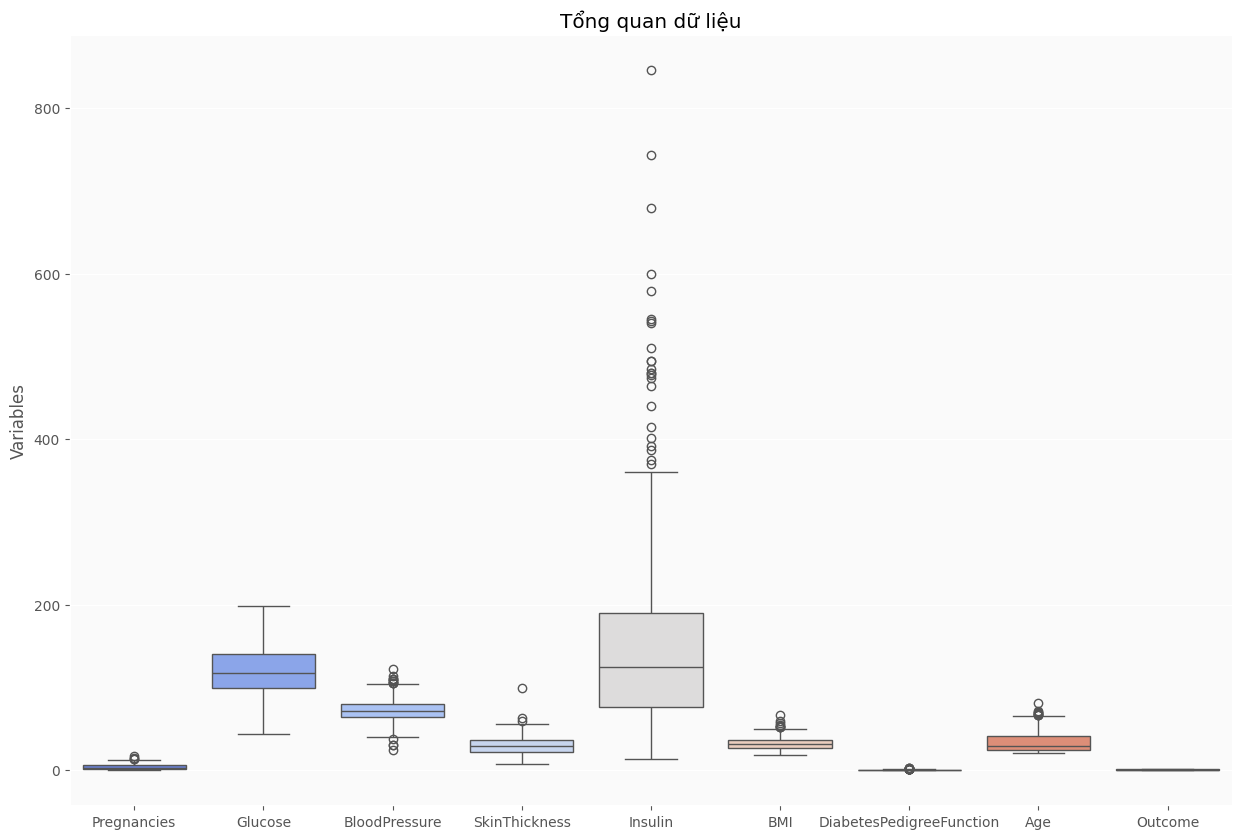

In [240]:
# -------------------------------
# Tổng quan dữ liệu bằng Boxplot ngang
# -------------------------------
plt.style.use('ggplot')

# Tạo figure và axes lớn
f, ax = plt.subplots(figsize=(15, 10))

# Tùy chỉnh axes
ax.set_facecolor('#fafafa')          # Nền sáng
ax.set(xlim=(-0.05, 200))            # Giới hạn trục x (theo dữ liệu)
plt.ylabel('Variables')
plt.title("Tổng quan dữ liệu")

# Vẽ boxplot ngang
sns.boxplot(
    data=data,
    orient='v',        # 'h' = horizontal
    palette='coolwarm',    # Bộ màu pastel đẹp
    ax=ax
)

**Kiểm tra giá trị ngoại lai**

In [241]:
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Insulin'] < Q1 - 1.5*IQR) | (data['Insulin'] > Q3 + 1.5*IQR)]
print(outliers.shape)

(24, 9)


In [242]:
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Glucose'] < Q1 - 1.5*IQR) | (data['Glucose'] > Q3 + 1.5*IQR)]
print(outliers.shape)

(0, 9)


**Tất cả các giá trị bị thiếu đã được thay thành NaN.**

In [243]:
zero_counts = (data[['BloodPressure','BMI','SkinThickness','Insulin','Glucose']] == 0).sum()
print(zero_counts)

BloodPressure    0
BMI              0
SkinThickness    0
Insulin          0
Glucose          0
dtype: int64


# 3️⃣Phân bố dữ liệu so với biến mục tiêu

**Phân bố dữ liệu (distribution):** cách các giá trị của một đặc trưng (feature) được sắp xếp, trải rộng ra sao (ví dụ: trung bình, min, max, hình dạng histogram).

**Biến mục tiêu (target):** cột muốn dự đoán, trong bài này là Outcome (0 = không tiểu đường, 1 = tiểu đường).

**Phân bố dữ liệu so với biến mục tiêu, tức là:** so sánh cách phân bố của một feature giữa các nhóm khác nhau của target.

**Ví dụ:**

Trong dataset: Glucose là feature. Outcome (0 = khỏe, 1 = bệnh tiểu đường) là target.

So sánh phân bố Glucose giữa Outcome = 0 và Outcome = 1 giúp thấy liệu nồng độ Glucose có liên quan đến bệnh không.

In [244]:
def correlation_plot(data):
    """
    Vẽ heatmap tương quan giữa tất cả các biến trong dataset,
    kèm giá trị số cho từng ô.
    """
    # Tính ma trận tương quan (Pearson) giữa các biến
    correlation = data.corr()

    # Lấy tên cột để làm nhãn trục
    matrix_cols = correlation.columns.tolist()

    # Chuyển DataFrame sang numpy array để dùng cho heatmap
    corr_array = np.array(correlation)

    # Tạo trace heatmap có text hiển thị giá trị
    trace = go.Heatmap(
        z=corr_array,           # giá trị tương quan
        x=matrix_cols,          # nhãn trục x
        y=matrix_cols,          # nhãn trục y
        colorscale='RdBu',      # bảng màu đối xứng âm/dương
        zmin=-1, zmax=1,        # để hiển thị rõ âm/dương
        text=np.round(corr_array, 2),  # làm tròn 2 chữ số
        texttemplate="%{text}",        # hiển thị text
        textfont={"size":10},          # cỡ chữ trong ô
        colorbar=dict(title="Correlation")
    )

    # Tạo layout cho heatmap
    layout = go.Layout(
        title='Correlation Matrix for variables',
        margin=dict(r=0, l=100, t=100, b=100),
        yaxis=dict(tickfont=dict(size=9), autorange="reversed"), # giữ đúng thứ tự
        xaxis=dict(tickfont=dict(size=9))
    )

    # Tạo figure và hiển thị
    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)

In [245]:
correlation_plot(data)

In [246]:
def top_correlated_features(data, target="Outcome", top_n=3):
    """
    Lấy danh sách các biến có tương quan mạnh nhất với biến mục tiêu.

    Parameters:
    - data: pandas DataFrame chứa dữ liệu
    - target: tên biến mục tiêu (mặc định: 'Outcome')
    - top_n: số lượng biến muốn lấy ra

    Returns:
    - List tên các biến có tương quan mạnh nhất với target
    """
    corr_matrix = data.corr()

    # Lấy top biến có tương quan mạnh nhất với target
    top_vars = (
        corr_matrix[target]
        .drop(target)              # bỏ chính target
        .abs()                     # lấy trị tuyệt đối
        .sort_values(ascending=False)
        .head(top_n)
        .index.tolist()
    )

    return top_vars

In [247]:
def plot_top_correlated_features_interactive(
    data,
    target="Outcome",
    top_features=None
):
    """
    Vẽ biểu đồ cột tương tác hiển thị mức độ tương quan
    âm/dương của các biến quan trọng nhất với biến target.
    """
    if top_features is None:
        top_features = top_correlated_features(data, target=target, top_n=8)

    corr_matrix = data.corr()
    correlations = corr_matrix[target][top_features]

    trace = go.Bar(
        x=correlations.index,
        y=correlations.values,
        text=[f"{val:.3f}" for val in correlations.values],
        textposition='auto',
        textfont=dict(size=10),
        hoverinfo="x+y+text",
        marker=dict(
            color=correlations.values,
            colorscale='RdBu',   # màu âm/dương
            cmin=-1,             # thang đo từ -1
            cmax=1,              # đến 1
            showscale=True
        )
    )

    layout = go.Layout(
        title=f"Tương quan các biến quan trọng nhất với {target}",
        margin=dict(r=0, l=100, t=100, b=100),
        xaxis=dict(title="Biến", tickfont=dict(size=9)),
        yaxis=dict(title="Hệ số tương quan (Pearson)", tickfont=dict(size=9), range=[-1,1]),
        bargap=0.4
    )

    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)


In [248]:
plot_top_correlated_features_interactive(data)

In [249]:
def median_target(var):
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [250]:
def plot_distribution(data_select, size_bin) :
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]

    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')

    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [251]:
plot_distribution('Insulin', 0)

In [252]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [253]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [254]:
plot_distribution('Glucose', 0)

In [255]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [256]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

In [257]:
plot_distribution('SkinThickness', 10)

In [258]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [259]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [260]:
plot_distribution('BloodPressure', 5)

In [261]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [262]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [263]:
plot_distribution('BMI', 0)

In [264]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [265]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [266]:
#plot distribution
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [267]:
#missing_plot(data, 'Outcome')

In [268]:
def plot_feat1_feat2(feat1, feat2) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers',
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [269]:
def barplot(var_select, sub):
    tmp1 = data[data['Outcome'] != 0]
    tmp2 = data[data['Outcome'] == 0]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select], data['Outcome']))
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    # Trace cho diabetic
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().index.tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition='auto',
        name='diabetic',
        opacity=0.8,
        marker=dict(
            color='gold',
            line=dict(color='#000000', width=1)
        )
    )

    # Trace cho healthy
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().index.tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition='auto',
        name='healthy',
        opacity=0.8,
        marker=dict(
            color='lightskyblue',
            line=dict(color='#000000', width=1)
        )
    )

    # Trace cho % diabetic
    trace3 = go.Scatter(
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis='y2',
        name='% diabetic',
        opacity=0.6,
        marker=dict(
            color='black',
            line=dict(color='#000000', width=0.5)
        )
    )

    # Layout
    layout = dict(
        title=str(var_select) + ' ' + sub,
        xaxis=dict(),
        yaxis=dict(title='Count'),
        yaxis2=dict(
            range=[0, 75],
            overlaying='y',
            anchor='x',
            side='right',
            zeroline=False,
            showgrid=False,
            title='% diabetic'
        )
    )

    # Tạo figure và vẽ
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)


In [270]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]

    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']

    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))


    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [271]:
plot_feat1_feat2('Glucose','Age')

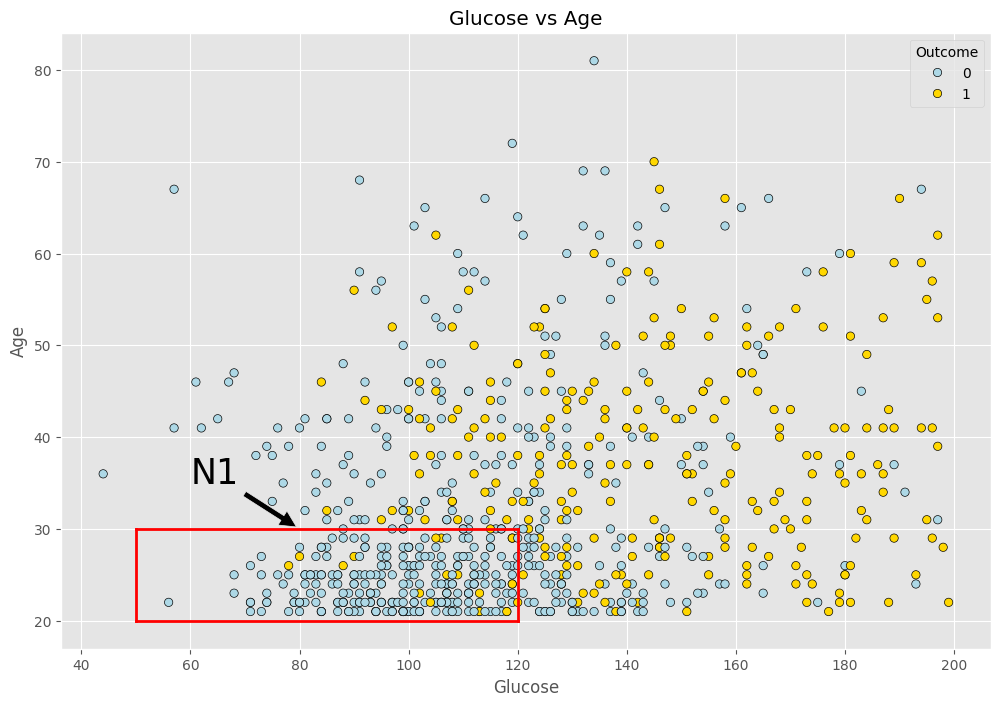

In [272]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

In [273]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [274]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [275]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

In [276]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

In [277]:
barplot('N2', ': BMI <= 30')

In [278]:
plot_pie('N2', 'BMI <= 30')

In [279]:
plot_feat1_feat2('Pregnancies','Age')

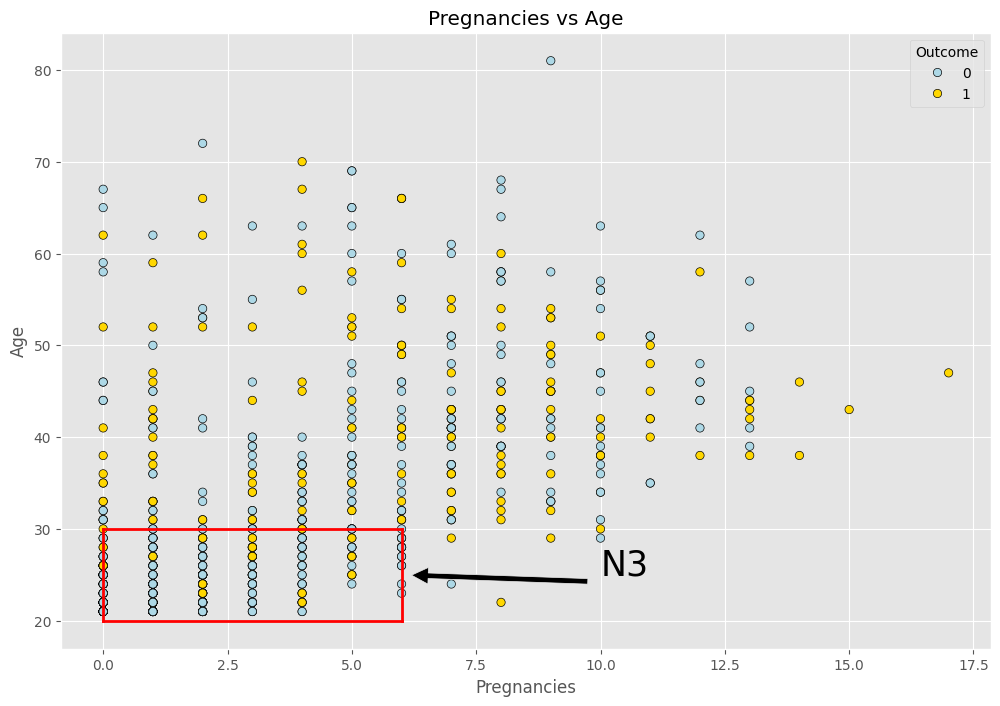

In [280]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

In [281]:
data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

In [282]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [283]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

In [284]:
plot_feat1_feat2('Glucose','BloodPressure')

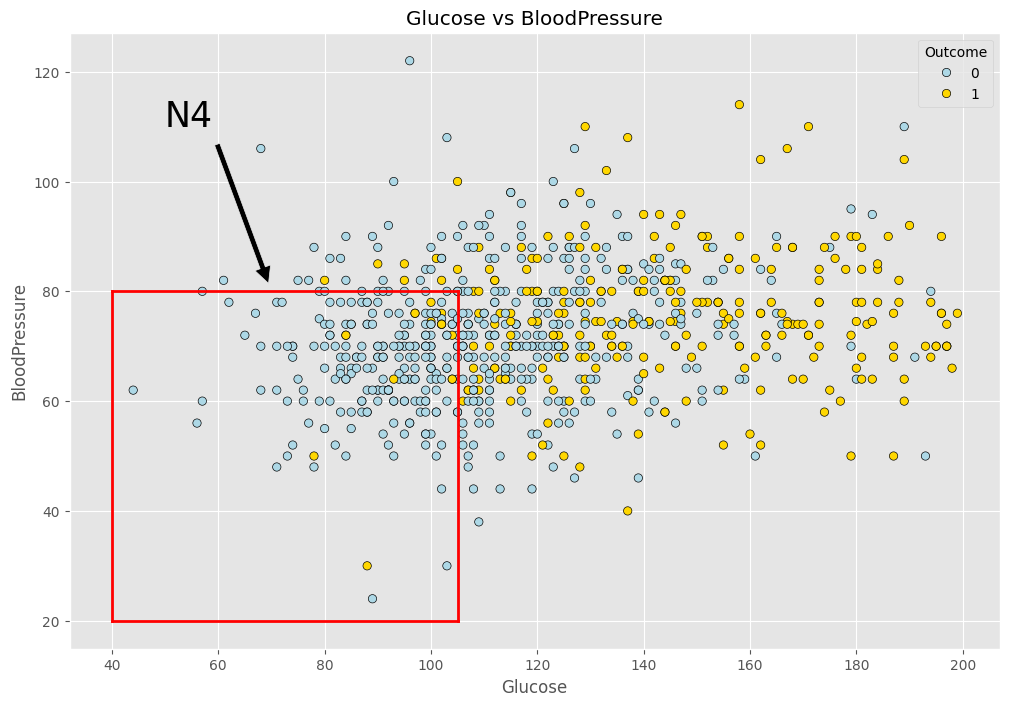

In [285]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BloodPressure'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [286]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

In [287]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [288]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

In [289]:
data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20) ,'N5']=1

In [290]:
barplot('N5', ':SkinThickness <= 20')

In [291]:
plot_pie('N5', 'SkinThickness <= 20')

In [292]:
plot_feat1_feat2('SkinThickness','BMI')

In [293]:
data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

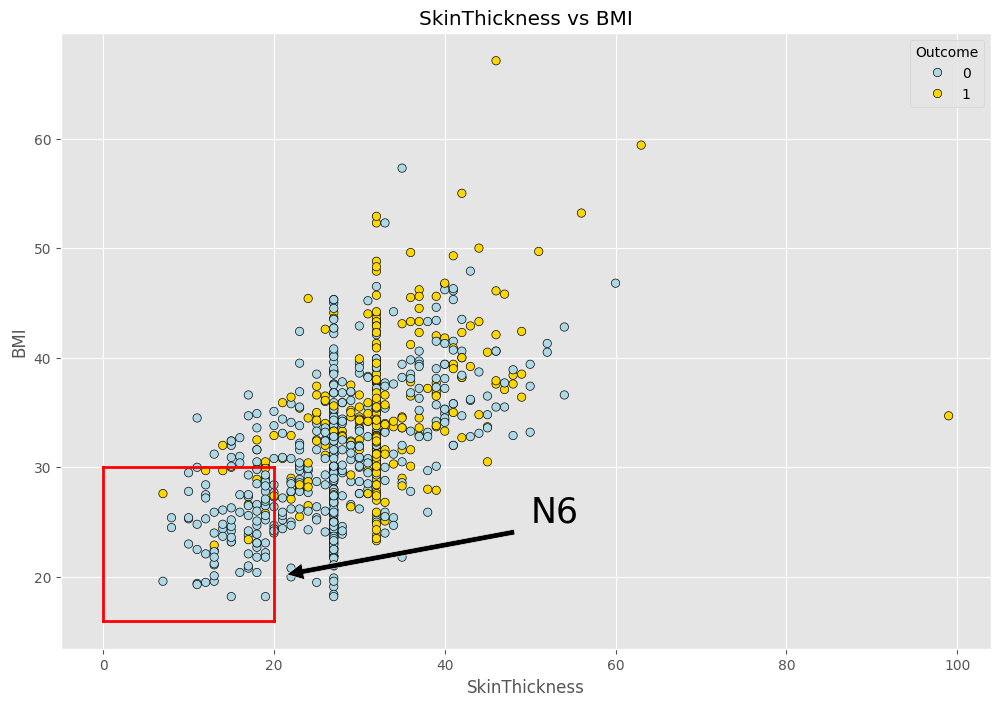

In [294]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['SkinThickness'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [295]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [296]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

In [297]:
plot_feat1_feat2('Glucose','BMI')

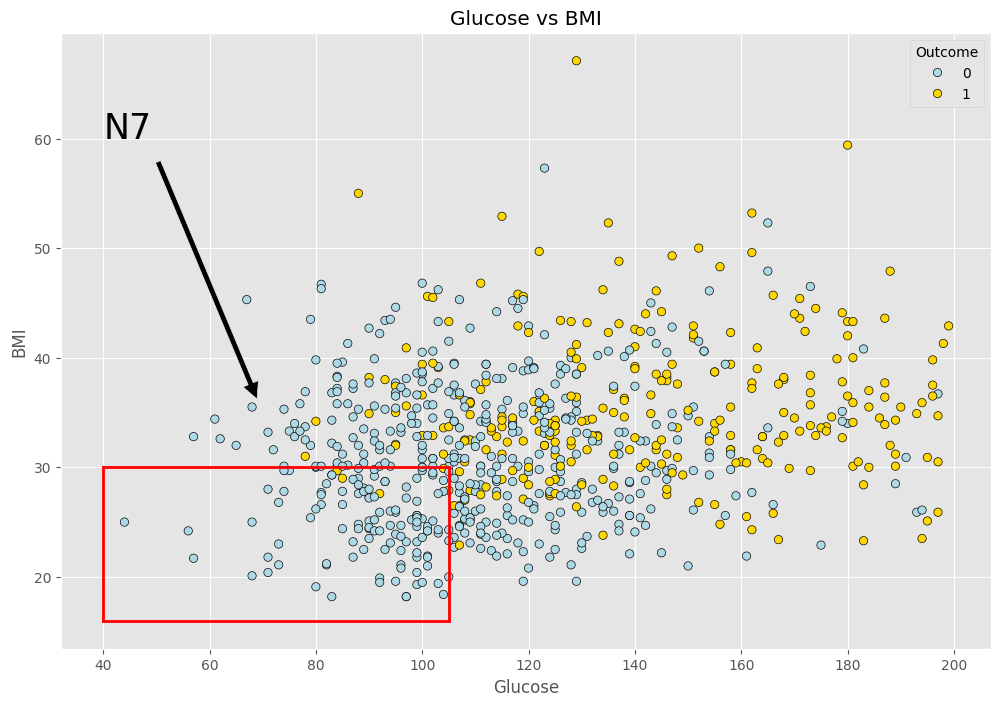

In [298]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [299]:
data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

In [300]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [301]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

In [302]:
plot_distribution('Insulin', 0)

In [303]:
data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

In [304]:
barplot('N9', ': Insulin < 200')

In [305]:
plot_pie('N9', 'Insulin < 200')

In [306]:
data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

In [307]:
barplot('N10', ': BloodPressure < 80')

In [308]:
plot_pie('N10', 'BloodPressure < 80')

In [309]:
plot_distribution('Pregnancies', 0)

In [310]:
data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11']=1

In [311]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [312]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

In [313]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']

In [314]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

In [315]:
plot_distribution('N0', 0)

In [316]:
data.loc[:,'N15']=0
data.loc[(data['N0']<1034) ,'N15']=1

In [317]:
barplot('N15', ': N0 < 1034')

In [318]:
plot_pie('N15', 'N0 < 1034')

In [319]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])

#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [320]:
def correlation_plot():
    import numpy as np
    import plotly.graph_objs as go
    import plotly.offline as py

    # Correlation
    correlation = data.corr()

    # Tick labels
    matrix_cols = correlation.columns.tolist()

    # Convert to array
    corr_array = np.array(correlation)

    # Heatmap trace
    trace = go.Heatmap(
        z=corr_array,
        x=matrix_cols,
        y=matrix_cols,
        colorscale='Viridis',
        colorbar=dict()
    )

    # Layout
    layout = go.Layout(
        title='Correlation Matrix for variables',
        margin=dict(r=0, l=100, t=0, b=100),
        yaxis=dict(tickfont=dict(size=9)),
        xaxis=dict(tickfont=dict(size=9))
    )

    # Figure
    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)


In [321]:
correlation_plot()

In [322]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   N1                        768 non-null    int64  
 2   N2                        768 non-null    int64  
 3   N3                        768 non-null    int64  
 4   N4                        768 non-null    int64  
 5   N5                        768 non-null    int64  
 6   N6                        768 non-null    int64  
 7   N7                        768 non-null    int64  
 8   N9                        768 non-null    int64  
 9   N10                       768 non-null    int64  
 10  N11                       768 non-null    int64  
 11  N15                       768 non-null    int64  
 12  Pregnancies               768 non-null    float64
 13  Glucose                   768 non-null    float64
 14  BloodPress

In [334]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [325]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# MÔ HÌNH SVM

In [326]:
# Khởi tạo mô hình SVM với kernel tuyến tính
SVM = SVC(kernel="linear")

# Huấn luyện mô hình
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [327]:
SVM_pred=SVM.predict(x_test)
SVM_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [328]:
print("Classification  Report : \n ",classification_report(y_test,SVM_pred))

Classification  Report : 
                precision    recall  f1-score   support

           0       0.94      0.93      0.93       107
           1       0.84      0.87      0.85        47

    accuracy                           0.91       154
   macro avg       0.89      0.90      0.89       154
weighted avg       0.91      0.91      0.91       154



In [329]:
print("Accuracy  : \n ",accuracy_score(y_test,SVM_pred))

Accuracy  : 
  0.9090909090909091


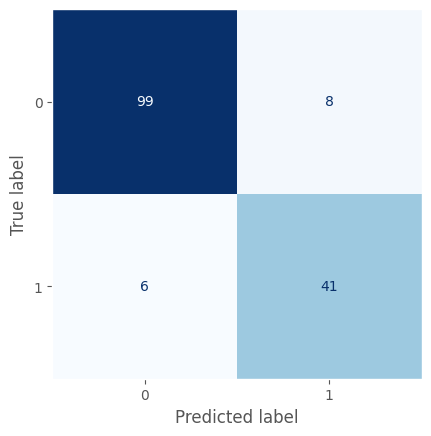

In [330]:
cm = confusion_matrix(y_test, SVM_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", colorbar=False)

plt.grid(False)  # tắt lằn trắng
plt.show()

In [348]:
input_data = (
    0,0,0,0,0,0,0,0,0,0,0,0,   # 12 cột N... (tất cả = 0)
    2,        # Pregnancies
    120,      # Glucose
    70,       # BloodPressure
    20,       # SkinThickness
    79,       # Insulin
    28.5,     # BMI
    0.35,     # DiabetesPedigreeFunction
    32,       # Age
    0,0,0,0 # 5 cột N... còn lại
)
# chuyển về numpy array
input_data = np.array(input_data)

# reshape về (1, -1) để mô hình hiểu đây là 1 sample có 24 features
input_data = input_data.reshape(1, -1)

# chuẩn hoá bằng scaler đã fit trước đó
input_data = scale.transform(input_data)

# kiểm tra
print(input_data)

[[ 3.12250226e-17 -9.48315500e-17  3.70074342e-17 -1.15648232e-17
  -1.38777878e-17  5.66676335e-17 -5.72458747e-17  7.51713506e-17
  -1.96601994e-17 -6.47630098e-17 -4.16333634e-17 -1.38777878e-17
   2.00000000e+00  1.20000000e+02  7.00000000e+01  2.00000000e+01
   7.90000000e+01  2.85000000e+01  3.50000000e-01  3.20000000e+01
   4.62592927e-18 -1.85037171e-17 -6.93889390e-18  4.62592927e-18]]


In [349]:
prediction = SVM.predict(input_data)
print("Kết quả dự đoán:", prediction)

Kết quả dự đoán: [1]


In [339]:
predictions=SVM.predict(x_test)
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [340]:
print("Accuracy of Traing Data :",accuracy_score(y_test,predictions))

Accuracy of Traing Data : 0.9090909090909091


In [341]:
print("Classification  Report : \n ",classification_report(y_test,predictions))

Classification  Report : 
                precision    recall  f1-score   support

           0       0.94      0.93      0.93       107
           1       0.84      0.87      0.85        47

    accuracy                           0.91       154
   macro avg       0.89      0.90      0.89       154
weighted avg       0.91      0.91      0.91       154



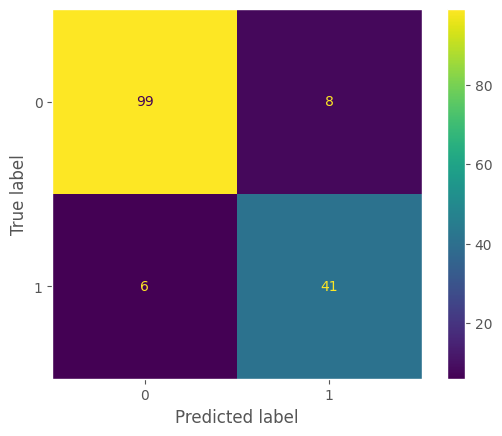

In [343]:
cm=confusion_matrix(y_test,predictions)
p=ConfusionMatrixDisplay(confusion_matrix=cm)
p.plot()
plt.grid(False)
plt.show()

In [350]:
input_data=scale.transform(input_data)
input_data

array([[ 6.24500451e-17, -1.89663100e-16,  7.40148683e-17,
        -2.31296463e-17, -2.77555756e-17,  1.13335267e-16,
        -1.14491749e-16,  1.50342701e-16, -3.93203988e-17,
        -1.29526020e-16, -8.32667268e-17, -2.77555756e-17,
         2.00000000e+00,  1.20000000e+02,  7.00000000e+01,
         2.00000000e+01,  7.90000000e+01,  2.85000000e+01,
         3.50000000e-01,  3.20000000e+01,  9.25185854e-18,
        -3.70074342e-17, -1.38777878e-17,  9.25185854e-18]])

In [351]:
def test_random_samples(X_test, y_test, model, n=5):
    idx = np.random.choice(len(X_test), n, replace=False)
    for i in idx:
        sample = X_test[i].reshape(1, -1)
        true_label = y_test.iloc[i] if hasattr(y_test, "iloc") else y_test[i]
        pred = model.predict(sample)
        print(f"Sample {i} -> Thật: {true_label}, Dự đoán: {pred[0]}")

In [355]:
test_random_samples(x_test, y_test, SVM, n=5)

Sample 37 -> Thật: 0, Dự đoán: 0
Sample 112 -> Thật: 1, Dự đoán: 1
Sample 82 -> Thật: 0, Dự đoán: 0
Sample 3 -> Thật: 1, Dự đoán: 1
Sample 49 -> Thật: 1, Dự đoán: 1


In [ ]:
'''def model_performance(model, subtitle, X, y):
    """
    Function to evaluate a classification model with 5-fold CV and show:
    - Confusion Matrix
    - Metrics (Accuracy, Precision, Recall, F1-score)
    - ROC Curve
    - Precision-Recall Curve

    Parameters:
        model: sklearn classification model
        subtitle: str, subtitle for the plot
        X: pd.DataFrame, features
        y: pd.Series, target
    """

    # KFold
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    y_real_list = []
    y_proba_list = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        pred_proba = model.predict_proba(X.iloc[test_idx])
        y_real_list.append(y.iloc[test_idx])
        y_proba_list.append(pred_proba[:,1])

        fpr, tpr, _ = roc_curve(y.iloc[test_idx], pred_proba[:,1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))  # dùng numpy.interp
        tprs[-1][0] = 0.0  # đảm bảo bắt đầu từ 0

    # Confusion matrix using cross_val_predict
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)

    # Trace 1: Confusion Matrix
    trace1 = go.Heatmap(
        z=conf_matrix,
        x=["0 (pred)", "1 (pred)"],
        y=["0 (true)", "1 (true)"],
        colorscale='Viridis',
        showscale=False
    )

    # Metrics calculation
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  = (tp + tn) / (tp + tn + fp + fn)
    Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    Recall    = tp / (tp + fn) if (tp + fn) > 0 else 0
    F1_score  = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0

    show_metrics = pd.DataFrame([[Accuracy, Precision, Recall, F1_score]]).T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(
        x=show_metrics[0].values,
        y=['Accuracy', 'Precision', 'Recall', 'F1_score'],
        text=np.round(show_metrics[0].values, 4),
        textposition='auto',
        textfont=dict(color='black'),
        orientation='h',
        opacity=1,
        marker=dict(color=colors, line=dict(color='#000000', width=1.5))
    )

    # ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    trace3 = go.Scatter(
        x=mean_fpr, y=mean_tpr,
        name='ROC',
        line=dict(color='rgb(22, 96, 167)', width=2),
        fill='tozeroy'
    )

    trace4 = go.Scatter(
        x=[0,1], y=[0,1],
        line=dict(color='black', width=1.5, dash='dot')
    )

    # Precision-Recall curve
    y_real_concat = pd.concat(y_real_list)
    y_proba_concat = np.concatenate(y_proba_list)
    precision_vals, recall_vals, _ = precision_recall_curve(y_real_concat, y_proba_concat)

    trace5 = go.Scatter(
        x=recall_vals, y=precision_vals,
        name='Precision-Recall',
        line=dict(color='lightcoral', width=2),
        fill='tozeroy'
    )

    # Subplots
    fig = tls.make_subplots(
        rows=2, cols=2, print_grid=False,
        specs=[[{}, {}], [{}, {}]],
        subplot_titles=(
            'Confusion Matrix', 'Metrics',
            'ROC curve (' + str(round(mean_auc,3)) + ')', 'Precision-Recall curve'
        )
    )

    # Add traces
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 2, 1)
    fig.append_trace(trace4, 2, 1)
    fig.append_trace(trace5, 2, 2)

    # Layout update
    fig['layout'].update(
        showlegend=False,
        title='<b>Model performance report (5 folds)</b><br>' + subtitle,
        autosize=False,
        height=830, width=830,
        plot_bgcolor='black',
        paper_bgcolor='black',
        margin=dict(b=195),
        font=dict(color='white')
    )

    fig["layout"]["xaxis1"].update(color='white')
    fig["layout"]["yaxis1"].update(color='white')
    fig["layout"]["xaxis2"].update(dict(range=[0,1], color='white'))
    fig["layout"]["yaxis2"].update(color='white')
    fig["layout"]["xaxis3"].update(dict(title="False Positive Rate", color='white'))
    fig["layout"]["yaxis3"].update(dict(title="True Positive Rate", color='white'))
    fig["layout"]["xaxis4"].update(dict(title="Recall", range=[0,1.05], color='white'))
    fig["layout"]["yaxis4"].update(dict(title="Precision", range=[0,1.05], color='white'))

    # Update annotation fonts
    for ann in fig['layout']['annotations']:
        ann['font'] = dict(color='white', size=14)

    # Show figure
    py.iplot(fig)

In [ ]:
''''def scores_table(model, subtitle):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})
    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 score', '<b>Roc auc'],
                    line = dict(color='#7D7F80'),
                    fill = dict(color='#a1c3d1'),
                    align = ['center'],
                    font = dict(size = 15)),
        cells=dict(values=[('1','2','3','4','5','mean', 'std'),
                           np.round(df['accuracy'],3),
                           np.round(df['precision'],3),
                           np.round(df['recall'],3),
                           np.round(df['f1'],3),
                           np.round(df['roc_auc'],3)],
                   line = dict(color='#7D7F80'),
                   fill = dict(color='#EDFAFF'),
                   align = ['center'], font = dict(size = 15)))

    layout = dict(width=800, height=400, title = '<b>Cross Validation - 5 folds</b><br>'+subtitle, font = dict(size = 15))
    fig = dict(data=[trace], layout=layout)

    py.iplot(fig, filename = 'styled_table')'''

In [ ]:
#model_performance(lgbm_clf, 'LightGBM')

In [ ]:
#scores_table(lgbm_clf, 'LightGBM')

# MÔ HÌNH KNN

In [362]:
x_train.shape

(614, 24)

In [365]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [366]:
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [368]:
knn.score(x_test,y_test)

0.7857142857142857

In [373]:
print("Accuracy Score :\n", accuracy_score(y_test, y_pred))

Accuracy Score :
 0.7857142857142857


In [374]:
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.84      0.86      0.85       107
      Normal       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



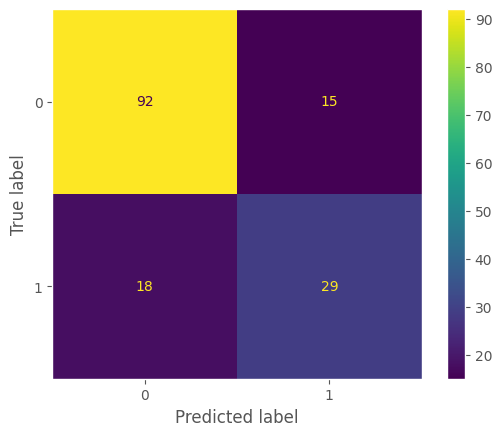

In [396]:
cm_knn=confusion_matrix(y_test, y_pred)
pl=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
pl.plot()
plt.grid(False)
plt.show()

# MÔ HÌNH Logistic Regression

In [390]:
model = LogisticRegression(solver='liblinear')
# instantiate the model

model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)

print(model_score)

0.8701298701298701


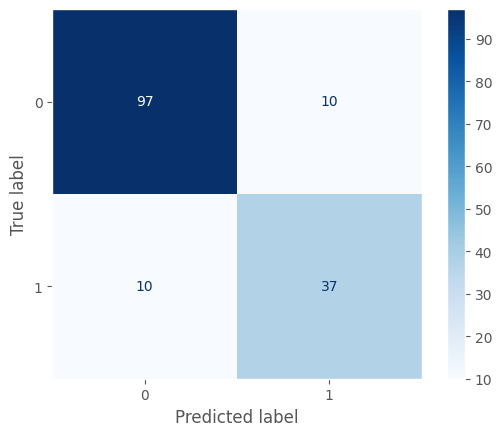

In [399]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)

In [400]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

AttributeError: 'dict' object has no attribute 'accuracy_score'